In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate

        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.5
        self.b1 = np.zeros((1, self.hidden_size))

        self.W2 = np.random.randn(self.hidden_size, 1) * 0.5
        self.b2 = np.zeros((1,1))

    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = X@self.W1 + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = self.a1@self.W2 + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a1, self.a2

    def backward(self, X, y, output):
        m = X.shape[0]
        output_error = y - output
        output_delta = output_error * self.sigmoid_derivative(output)

        hidden_error = output_delta.dot(self.W2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.a1)

        self.W2 += self.a1.T.dot(output_delta) * self.learning_rate / m
        self.b2 += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate / m

        self.W1 += X.T.dot(hidden_delta) * self.learning_rate / m
        self.b1 += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate / m

    def train(self, X, y, epochs=1000):
        losses = []
        for epoch in range(epochs):
            _, output = self.forward(X)

            loss = np.mean((y - output) ** 2)
            losses.append(loss)

            self.backward(X, y, output)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")
        return losses

    def predict(self, X):
        _, output = self.forward(X)
        return output

=== Simple Neural Network Demo ===

Creating XOR dataset...
Input data:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Expected outputs:
[0 1 1 0]

Creating neural network...
Training neural network...

Epoch 0, Loss: 0.262443
Epoch 100, Loss: 0.259719
Epoch 200, Loss: 0.257561
Epoch 300, Loss: 0.255865
Epoch 400, Loss: 0.254541
Epoch 500, Loss: 0.253512
Epoch 600, Loss: 0.252717
Epoch 700, Loss: 0.252103
Epoch 800, Loss: 0.251631
Epoch 900, Loss: 0.251268
Epoch 1000, Loss: 0.250990
Epoch 1100, Loss: 0.250777
Epoch 1200, Loss: 0.250613
Epoch 1300, Loss: 0.250488
Epoch 1400, Loss: 0.250393
Epoch 1500, Loss: 0.250319
Epoch 1600, Loss: 0.250263
Epoch 1700, Loss: 0.250221
Epoch 1800, Loss: 0.250188
Epoch 1900, Loss: 0.250163
Epoch 2000, Loss: 0.250143
Epoch 2100, Loss: 0.250128
Epoch 2200, Loss: 0.250117
Epoch 2300, Loss: 0.250108
Epoch 2400, Loss: 0.250102
Epoch 2500, Loss: 0.250096
Epoch 2600, Loss: 0.250092
Epoch 2700, Loss: 0.250089
Epoch 2800, Loss: 0.250087
Epoch 2900, Loss: 0.250085
Epoch 3000, Loss:

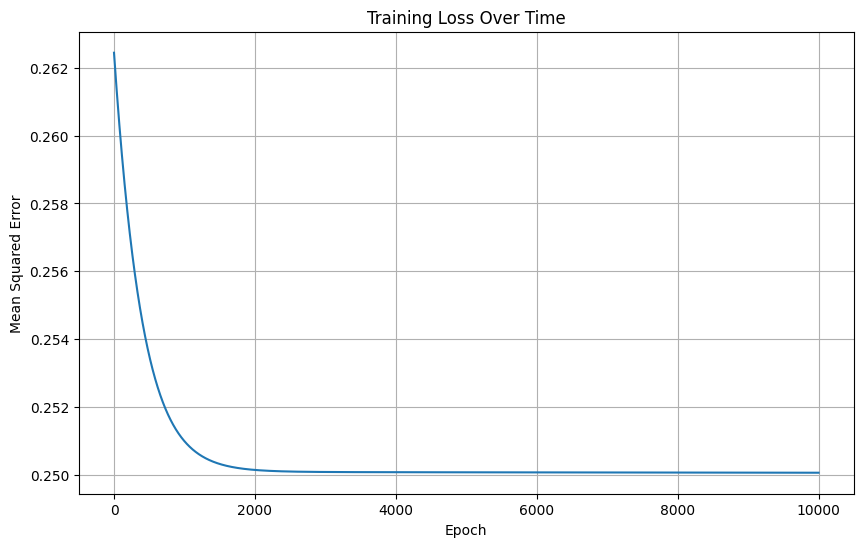


Final loss: 0.250061
Training complete!


In [13]:
# Example usage and demonstration
if __name__ == "__main__":
    print("=== Simple Neural Network Demo ===\n")
    
    # Create some sample data (XOR problem)
    # XOR is a classic problem that's not linearly separable
    print("Creating XOR dataset...")
    X = np.array([[0, 0],    # Input: [0, 0] -> Output: 0
                  [0, 1],    # Input: [0, 1] -> Output: 1
                  [1, 0],    # Input: [1, 0] -> Output: 1
                  [1, 1]])   # Input: [1, 1] -> Output: 0
    
    y = np.array([[0],       # Expected outputs
                  [1],
                  [1],
                  [0]])
    
    print("Input data:")
    print(X)
    print("Expected outputs:")
    print(y.flatten())
    print()
    
    # Create and train the neural network
    print("Creating neural network...")
    # 2 inputs, 4 hidden neurons, learning rate 0.5
    nn = SimpleNeuralNetwork(input_size=2, hidden_size=4, learning_rate=0.01)
    
    print("Training neural network...\n")
    losses = nn.train(X, y, epochs=10000)
    
    # Test the trained network
    print("\n=== Testing the trained network ===")
    predictions = nn.predict(X)
    
    print("Input -> Expected -> Predicted -> Rounded")
    for i in range(len(X)):
        rounded = 1 if predictions[i][0] > 0.5 else 0
        print(f"{X[i]} -> {y[i][0]} -> {predictions[i][0]:.4f} -> {rounded}")
    
    # Plot the training loss
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.title('Training Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()
    
    print(f"\nFinal loss: {losses[-1]:.6f}")
    print("Training complete!")